## Linear Activation Neural Network
### Step 1: Import Required Libraries

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Step 2: Define Helper Functions
#### 1. Activation Function and Its Derivative

In [108]:
def linear(x):
    return x

def linear_derivative(x):
    return np.ones_like(x)

#### 2. Loss Function and Its Derivative

In [109]:
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mse_loss_derivative(y_true, y_pred):
    return -2 * (y_true - y_pred) / y_true.size


#### Step 3: Initialize Parameters

In [110]:
def initialize_parameters(layer_sizes):
    weights = []
    biases = []

    for i in range(len(layer_sizes) - 1):
        weights.append(np.random.randn(layer_sizes[i], layer_sizes[i + 1]))
        biases.append(np.random.randn(1, layer_sizes[i + 1]))

    return weights, biases

#### Step 4: Forward Propagation

In [111]:
def forward(X, weights, biases):
    activations = [X]
    z_values = []

    for i in range(len(weights)):
        z = np.dot(activations[-1], weights[i]) + biases[i]
        z_values.append(z)
        a = linear(z)
        activations.append(a)

    return activations, z_values


#### Step 5: Backward Propagation

In [112]:
def backward(y_true, activations, z_values, weights, biases):
    gradients_w = [np.zeros_like(w) for w in weights]
    gradients_b = [np.zeros_like(b) for b in biases]

    delta = mse_loss_derivative(y_true, activations[-1]) * linear_derivative(z_values[-1])

    for i in reversed(range(len(weights))):
        gradients_w[i] = np.dot(activations[i].T, delta)
        gradients_b[i] = np.sum(delta, axis=0, keepdims=True)
        if i != 0:
            delta = np.dot(delta, weights[i].T) * linear_derivative(z_values[i - 1])

    return gradients_w, gradients_b


#### Step 6: Update Parameters

In [113]:
def update_parameters(weights, biases, gradients_w, gradients_b, learning_rate):
    for i in range(len(weights)):
        weights[i] -= learning_rate * gradients_w[i]
        biases[i] -= learning_rate * gradients_b[i]


#### Step 7: Training

In [117]:
def train(X, y, layer_sizes, epochs, learning_rate):
    weights, biases = initialize_parameters(layer_sizes)
    loss_history = []

    for epoch in range(epochs):
        activations, z_values = forward(X, weights, biases)
        loss = mse_loss(y, activations[-1])
        loss_history.append(loss)

        gradients_w, gradients_b = backward(y, activations, z_values, weights, biases)
        update_parameters(weights, biases, gradients_w, gradients_b, learning_rate)

        if epoch % 50 == 0:
            print(f'Epoch {epoch}/{epochs} - Loss: {loss}')

    return weights, biases, loss_history


#### Step 8: Predictions and Visualization

Epoch 0/1000 - Loss: 13.288827771531249
Epoch 50/1000 - Loss: 0.1624073907715643
Epoch 100/1000 - Loss: 0.014673295077530171
Epoch 150/1000 - Loss: 0.008337149108740742
Epoch 200/1000 - Loss: 0.008076875349411915
Epoch 250/1000 - Loss: 0.008066293122730987
Epoch 300/1000 - Loss: 0.00806586378678216
Epoch 350/1000 - Loss: 0.008065846375541735
Epoch 400/1000 - Loss: 0.008065845669509839
Epoch 450/1000 - Loss: 0.008065845640880505
Epoch 500/1000 - Loss: 0.0080658456397196
Epoch 550/1000 - Loss: 0.008065845639672527
Epoch 600/1000 - Loss: 0.008065845639670615
Epoch 650/1000 - Loss: 0.008065845639670534
Epoch 700/1000 - Loss: 0.008065845639670534
Epoch 750/1000 - Loss: 0.008065845639670534
Epoch 800/1000 - Loss: 0.00806584563967054
Epoch 850/1000 - Loss: 0.008065845639670532
Epoch 900/1000 - Loss: 0.008065845639670534
Epoch 950/1000 - Loss: 0.008065845639670534


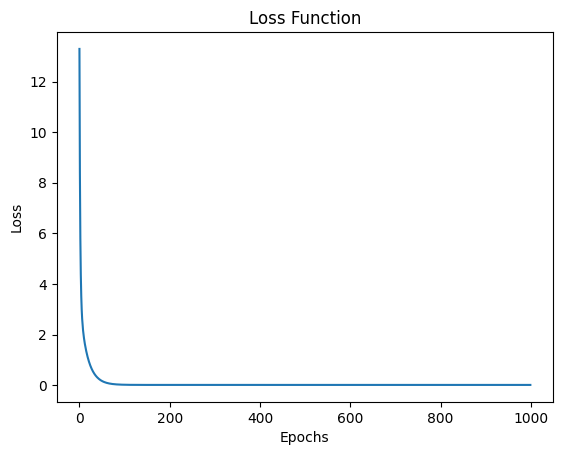

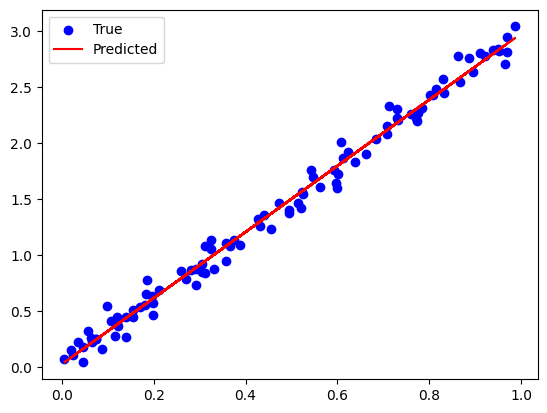

In [120]:
def predict(X, weights, biases):
    activations, _ = forward(X, weights, biases)
    return activations[-1]

# Data
np.random.seed(42)
X = np.random.rand(100, 1)
y = 3 * X + np.random.randn(100, 1) * 0.1

# Train the network
layer_sizes = [1, 10, 1]
weights, biases, loss_history = train(X, y, layer_sizes, epochs=1000, learning_rate=0.01)

# Plot the loss
plt.plot(range(len(loss_history)), loss_history)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Function')
plt.show()

# Predict and plot the results
y_pred = predict(X, weights, biases)

plt.scatter(X, y, color='blue', label='True')
plt.plot(X, y_pred, color='red', label='Predicted')
plt.legend()
plt.show()

## Sigmoid Activation Neural Network

#### Step 1: Define Helper Functions
#### 1. Activation Function and Its Derivative

In [93]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))


#### 2. Loss Function and Its Derivative

In [94]:
def binary_cross_entropy_loss(y_true, y_pred, weights, lambda_reg):
    epsilon = 1e-12
    y_pred = np.clip(y_pred, epsilon, 1. - epsilon)
    cross_entropy_loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    
    # L2 regularization term (lambda_reg * sum of squared weights)
    l2_regularization = lambda_reg * sum(np.sum(w**2) for w in weights)
    
    return cross_entropy_loss + l2_regularization

def binary_cross_entropy_loss_derivative(y_true, y_pred):
    epsilon = 1e-12
    y_pred = np.clip(y_pred, epsilon, 1. - epsilon)
    return (y_pred - y_true) / (y_pred * (1 - y_pred) * y_true.size)


#### Step 3: Initialize Parameters

In [95]:
def initialize_parameters(layer_sizes):
    weights = []
    biases = []

    for i in range(len(layer_sizes) - 1):
        weights.append(np.random.randn(layer_sizes[i], layer_sizes[i + 1]))
        biases.append(np.random.randn(1, layer_sizes[i + 1]))

    return weights, biases


#### Step 4: Forward Propagation

In [96]:
def forward(X, weights, biases):
    activations = [X]
    z_values = []

    for i in range(len(weights)):
        z = np.dot(activations[-1], weights[i]) + biases[i]
        z_values.append(z)
        a = sigmoid(z)
        activations.append(a)

    return activations, z_values


#### Step 5: Backward Propagation

In [97]:
def backward(y_true, activations, z_values, weights):
    gradients_w = [np.zeros_like(w) for w in weights]
    gradients_b = [np.zeros_like(b) for b in biases]

    delta = binary_cross_entropy_loss_derivative(y_true, activations[-1]) * sigmoid_derivative(z_values[-1])

    for i in reversed(range(len(weights))):
        gradients_w[i] = np.dot(activations[i].T, delta)
        gradients_b[i] = np.sum(delta, axis=0, keepdims=True)
        if i != 0:
            delta = np.dot(delta, weights[i].T) * sigmoid_derivative(z_values[i - 1])

    return gradients_w, gradients_b


#### Step 6: Update Parameters

In [98]:
def update_parameters(weights, biases, gradients_w, gradients_b, learning_rate):
    for i in range(len(weights)):
        weights[i] -= learning_rate * gradients_w[i]
        biases[i] -= learning_rate * gradients_b[i]


#### Step 7: Training

In [99]:
def train(X, y, layer_sizes, epochs, learning_rate, lambda_reg):
    weights, biases = initialize_parameters(layer_sizes)
    loss_history = []

    for epoch in range(epochs):
        activations, z_values = forward(X, weights, biases)
        
        # Update the loss with regularization
        loss = binary_cross_entropy_loss(y, activations[-1], weights, lambda_reg)
        loss_history.append(loss)

        gradients_w, gradients_b = backward(y, activations, z_values, weights)
        update_parameters(weights, biases, gradients_w, gradients_b, learning_rate)

        if epoch % 100 == 0:
            print(f'Epoch {epoch}/{epochs} - Loss: {loss}')

    return weights, biases, loss_history


#### Step 8: Predictions and Visualization

Epoch 0/3200 - Loss: 1.0390695029494832
Epoch 100/3200 - Loss: 0.9951546080185745
Epoch 200/3200 - Loss: 0.9688816626714782
Epoch 300/3200 - Loss: 0.9467611603683875
Epoch 400/3200 - Loss: 0.9266448322762332
Epoch 500/3200 - Loss: 0.9080815393722028
Epoch 600/3200 - Loss: 0.8908907918313683
Epoch 700/3200 - Loss: 0.874949384682357
Epoch 800/3200 - Loss: 0.8601551960461784
Epoch 900/3200 - Loss: 0.8464191133744946
Epoch 1000/3200 - Loss: 0.8336622872552727
Epoch 1100/3200 - Loss: 0.8218146840896534
Epoch 1200/3200 - Loss: 0.810814054820636
Epoch 1300/3200 - Loss: 0.8006050782035055
Epoch 1400/3200 - Loss: 0.7911385998592264
Epoch 1500/3200 - Loss: 0.7823709375553899
Epoch 1600/3200 - Loss: 0.7742632400679444
Epoch 1700/3200 - Loss: 0.7667808935525069
Epoch 1800/3200 - Loss: 0.7598929723170638
Epoch 1900/3200 - Loss: 0.7535717324318103
Epoch 2000/3200 - Loss: 0.7477921474804508
Epoch 2100/3200 - Loss: 0.7425314862157333
Epoch 2200/3200 - Loss: 0.7377689320387948
Epoch 2300/3200 - Loss: 0

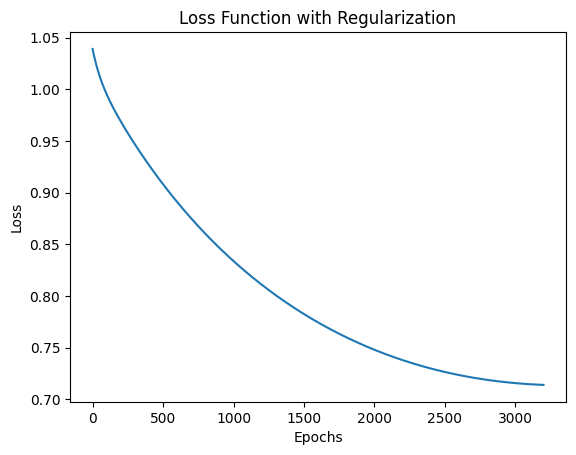

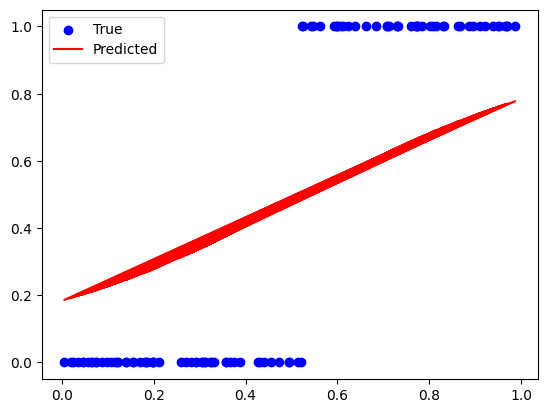

In [105]:
def predict(X, weights, biases):
    activations, _ = forward(X, weights, biases)
    return activations[-1]

# Data
np.random.seed(42)
X = np.random.rand(100, 1)
y = (3 * X + np.random.randn(100, 1) * 0.1 > 1.5).astype(int)

# Set regularization strength
lambda_reg = 0.01  # Adjust this value as needed

# Train the network with regularization
layer_sizes = [1, 10, 1]
weights, biases, loss_history = train(X, y, layer_sizes, epochs=3200, learning_rate=0.01, lambda_reg=lambda_reg)

# Plot the loss
plt.plot(range(len(loss_history)), loss_history)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Function with Regularization')
plt.show()

# Predict and plot the results
y_pred = predict(X, weights, biases)

plt.scatter(X, y, color='blue', label='True')
plt.plot(X, y_pred, color='red', label='Predicted')
plt.legend()
plt.show()